<a href="https://colab.research.google.com/github/01Sagar10/Project/blob/main/House_Pricing_Changed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Train Data

In [145]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data science projects /House pricing kaggle/train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [146]:
data['YrSold_num'] = 2024 - data['YrSold']
data['YearBuilt_num'] = 2024 - data['YearBuilt']
data['GarageYrBlt_num'] = 2024 - data['GarageYrBlt']
data['YearRemodAdd'] = 2024 - data['YearRemodAdd']
data.drop(['YearRemodAdd','YearBuilt', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [147]:
y = data['SalePrice']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   object 
 3   LotFrontage      1201 non-null   float64
 4   LotArea          1460 non-null   int64  
 5   Street           1460 non-null   object 
 6   Alley            91 non-null     object 
 7   LotShape         1460 non-null   object 
 8   LandContour      1460 non-null   object 
 9   Utilities        1460 non-null   object 
 10  LotConfig        1460 non-null   object 
 11  LandSlope        1460 non-null   object 
 12  Neighborhood     1460 non-null   object 
 13  Condition1       1460 non-null   object 
 14  Condition2       1460 non-null   object 
 15  BldgType         1460 non-null   object 
 16  HouseStyle       1460 non-null   object 
 17  OverallQual   

In [148]:
data_obj = data.select_dtypes(include='object')
data_num = data.select_dtypes(exclude = 'object')

In [149]:
ord_cols = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                               'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces','YrSold_num']

In [150]:
data_num = data_num.drop(ord_cols + ['SalePrice', 'Id'], axis =1)

In [151]:
data_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YearBuilt_num', 'GarageYrBlt_num'],
      dtype='object')

In [11]:
data_obj.isnull().sum()

7481

###Fill data with modes of object columns

In [152]:
data_obj.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [153]:
data_obj["BsmtQual"]= data_obj["BsmtQual"].fillna(data_obj['BsmtQual'].mode()[0])
data_obj["BsmtCond"] = data_obj["BsmtCond"].fillna(data_obj['BsmtCond'].mode()[0])
data_obj['BsmtExposure']= data_obj['BsmtExposure'].fillna(data_obj['BsmtExposure'].mode()[0])
data_obj['BsmtFinType1'] = data_obj['BsmtFinType1'].fillna(data_obj['BsmtFinType1'].mode()[0])
data_obj['BsmtFinType2'] = data_obj['BsmtFinType2'].fillna(data_obj['BsmtFinType2'].mode()[0])
data_obj['Electrical'] = data_obj['Electrical'].fillna(data_obj['Electrical'].mode()[0])

In [154]:
data_obj.isnull().sum()

,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


In [155]:
data_obj.groupby('BldgType')['GarageType'].value_counts().sort_values(ascending=False)

BldgType  GarageType
1Fam      Attchd        748
          Detchd        314
TwnhsE    Attchd         91
1Fam      BuiltIn        81
Duplex    Detchd         22
Twnhs     Detchd         21
TwnhsE    Detchd         18
1Fam      Basment        16
Twnhs     Attchd         13
2fmCon    Detchd         12
Duplex    Attchd         11
2fmCon    Attchd          7
1Fam      CarPort         4
Duplex    CarPort         4
Twnhs     BuiltIn         4
1Fam      2Types          3
TwnhsE    Basment         3
Duplex    2Types          2
          BuiltIn         1
2fmCon    2Types          1
          BuiltIn         1
          CarPort         1
TwnhsE    BuiltIn         1
Name: count, dtype: int64

In [156]:
#took values from above groupby, whichever BldgType has highest Garagetype value
#1fam =  Attchd
#TwnhsE = Attchd
#Twnhs = Detchd
#Duplex = Detchd
#2fmCon = Detchd

btype = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
gtype = ['Attchd', 'Detchd', 'Detchd', 'Detchd', 'Detchd']

for i in range(len(btype)):
  data_obj.loc[(data_obj['BldgType'] == btype[i]) & (data_obj['GarageType'].isnull()), 'GarageType'] = gtype[i]

In [157]:
data_obj.groupby('BldgType')['GarageFinish'].value_counts().sort_values(ascending=False)

BldgType  GarageFinish
1Fam      Unf             505
          RFn             365
          Fin             296
TwnhsE    Fin              49
          RFn              46
Duplex    Unf              37
Twnhs     Unf              28
TwnhsE    Unf              18
2fmCon    Unf              17
Twnhs     RFn               8
2fmCon    Fin               3
          RFn               2
Duplex    Fin               2
Twnhs     Fin               2
Duplex    RFn               1
Name: count, dtype: int64

In [158]:
#took values from above groupby, whichever BldgType has highest Garagefin value
#1fam =  Unf
#TwnhsE = Fin
#Twnhs = Unf
#Duplex = Unf
#2fmCon = Unf

btype = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
g_fin = ['Unf', 'Fin', 'Unf', 'Unf', 'Unf']

for i in range(len(btype)):
  data_obj.loc[(data_obj['BldgType'] == btype[i] ) & (data_obj['GarageFinish'].isnull()), 'GarageFinish'] = g_fin[i]

In [159]:
data_obj.groupby('BldgType')['GarageQual'].value_counts().sort_values(ascending=False)

BldgType  GarageQual
1Fam      TA            1104
TwnhsE    TA             112
1Fam      Fa              46
Duplex    TA              39
Twnhs     TA              38
2fmCon    TA              18
1Fam      Gd              11
          Ex               3
          Po               2
2fmCon    Gd               2
          Fa               1
          Po               1
Duplex    Fa               1
TwnhsE    Gd               1
Name: count, dtype: int64

In [160]:
#filling garagetype based on btype
btype = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
gq_type = ['TA', 'TA', 'TA', 'TA', 'TA']

for i in range(len(btype)):
  data_obj.loc[(data_obj['BldgType'] == btype[i] ) & (data_obj['GarageQual'].isnull()), 'GarageQual'] = gq_type[i]

In [161]:
data_obj.groupby('BldgType')['GarageCond'].value_counts().sort_values(ascending=False)

BldgType  GarageCond
1Fam      TA            1117
TwnhsE    TA             113
Duplex    TA              39
Twnhs     TA              38
1Fam      Fa              32
2fmCon    TA              19
1Fam      Gd               9
          Po               6
          Ex               2
2fmCon    Fa               2
          Po               1
Duplex    Fa               1
Name: count, dtype: int64

In [162]:
#filling garagecond
btype = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
gc_type = ['TA', 'TA', 'TA', 'TA', 'TA']


for i in range(len(btype)):
  data_obj.loc[(data_obj['BldgType'] == btype[i] ) & (data_obj['GarageCond'].isnull()), 'GarageCond'] = gc_type[i]

In [163]:
data_obj.isnull().sum().sum()

0

##Handling data_num null values

In [164]:
data_num.isnull().sum().sum()

348

In [165]:
data_num['MasVnrArea'].isna().sum()

8

In [166]:
data_num['MasVnrArea'] = data_num['MasVnrArea'].fillna(data_num['MasVnrArea'].mean())

In [167]:
data_num.groupby('LotArea')['LotFrontage'].value_counts().sort_values(ascending=False)

,,count
LotArea,LotFrontage,
7200,60.0,24
9600,80.0,14
6000,50.0,14
10800,60.0,12
1680,21.0,10
...,...,...
8767,65.0,1
8769,65.0,1
8773,57.0,1


In [168]:
#fillna lotfrontage
area = [1680, 6000, 7200, 9600, 10800]
front = [21, 50, 60, 80, 100]

for i in range(len(area)):
  data_num.loc[(data_num['LotArea'] <= area[i]) & (data_num['LotFrontage'].isnull()), 'LotFrontage'] = front[i]

data_num.loc[data_num['LotFrontage'].isnull(), 'LotFrontage'] = front[-1]  # or any other suitable default

In [169]:
data_num.isnull().sum()

,0
MSSubClass,0
LotFrontage,0
LotArea,0
MasVnrArea,0
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
2ndFlrSF,0


In [170]:
#filling GarageYrBlt_num
for i in data_num['GarageYrBlt_num']:
  data_num.loc[data_num['GarageYrBlt_num'].isna(), 'GarageYrBlt_num'] = data_num['YearBuilt_num']

#Label Encodoing and Scaling

In [171]:
le = LabelEncoder()

for col in data_obj.columns:
  data_obj[col] = le.fit_transform(data_obj[col])

data_obj

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [172]:
ord_cols

['OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'YrSold_num']

In [173]:
data_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1460 non-null   int64
 1   Street         1460 non-null   int64
 2   LotShape       1460 non-null   int64
 3   LandContour    1460 non-null   int64
 4   Utilities      1460 non-null   int64
 5   LotConfig      1460 non-null   int64
 6   LandSlope      1460 non-null   int64
 7   Neighborhood   1460 non-null   int64
 8   Condition1     1460 non-null   int64
 9   Condition2     1460 non-null   int64
 10  BldgType       1460 non-null   int64
 11  HouseStyle     1460 non-null   int64
 12  RoofStyle      1460 non-null   int64
 13  RoofMatl       1460 non-null   int64
 14  Exterior1st    1460 non-null   int64
 15  Exterior2nd    1460 non-null   int64
 16  ExterQual      1460 non-null   int64
 17  ExterCond      1460 non-null   int64
 18  Foundation     1460 non-null   int64
 19  BsmtQu

In [174]:
#Concating data_obj and numerical cols of ordinal nature
data_labld = pd.concat([data_obj, data[ord_cols]], axis = 1)
data_labld

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,YrSold_num
0,3,1,3,3,0,4,0,5,2,2,...,5,1,0,2,1,3,1,8,0,16
1,3,1,3,3,0,2,0,24,1,2,...,8,0,1,2,0,3,1,6,1,17
2,3,1,0,3,0,4,0,5,2,2,...,5,1,0,2,1,3,1,6,1,16
3,3,1,0,3,0,0,0,6,2,2,...,5,1,0,1,0,3,1,7,1,18
4,3,1,0,3,0,2,0,15,2,2,...,5,1,0,2,1,4,1,9,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,5,0,0,2,1,3,1,7,1,17
1456,3,1,3,3,0,4,0,14,2,2,...,6,1,0,2,0,3,1,7,2,14
1457,3,1,3,3,0,4,0,6,2,2,...,9,0,0,2,0,4,1,9,2,14
1458,3,1,3,3,0,4,0,12,2,2,...,6,1,0,1,0,2,1,5,0,14


In [175]:
data_num#['HalfBath']

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_num,GarageYrBlt_num
0,60,65.0,8450,196.0,706,0,150,856,856,854,...,0,61,0,0,0,0,0,2,21,21.0
1,20,80.0,9600,0.0,978,0,284,1262,1262,0,...,298,0,0,0,0,0,0,5,48,48.0
2,60,68.0,11250,162.0,486,0,434,920,920,866,...,0,42,0,0,0,0,0,9,23,23.0
3,70,60.0,9550,0.0,216,0,540,756,961,756,...,0,35,272,0,0,0,0,2,109,26.0
4,60,84.0,14260,350.0,655,0,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,24,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,0.0,0,0,953,953,953,694,...,0,40,0,0,0,0,0,8,25,25.0
1456,20,85.0,13175,119.0,790,163,589,1542,2073,0,...,349,0,0,0,0,0,0,2,46,46.0
1457,70,66.0,9042,0.0,275,0,877,1152,1188,1152,...,0,60,0,0,0,0,2500,5,83,83.0
1458,20,68.0,9717,0.0,49,1029,0,1078,1078,0,...,366,0,112,0,0,0,0,4,74,74.0


In [176]:
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)
data_num_scaled = pd.DataFrame(data_num_scaled, columns = data_num.columns)
data_num_scaled

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_num,GarageYrBlt_num
0,0.073375,-0.334246,-0.207142,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.050994,-1.007405
1,-0.872563,0.287145,-0.091886,-0.574410,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.156734,0.019300
2,0.073375,-0.209968,0.073480,0.323060,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-0.984752,-0.931353
3,0.309859,-0.541377,-0.096897,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.863632,-0.817275
4,0.073375,0.452850,0.375148,1.364570,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,-0.951632,-0.893327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.458525,-0.260560,-0.574410,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.918511,-0.855301
1456,-0.872563,0.494276,0.266407,0.084843,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-0.222975,-0.056753
1457,0.309859,-0.292820,-0.147810,-0.574410,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.002492,1.350213
1458,-0.872563,-0.209968,-0.080160,-0.574410,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,0.704406,1.007978


# Regularisation

In [28]:
data_scaled_encoded = pd.concat([data_labld, data_num_scaled], axis =1)
#data_scaled_encoded = data_scaled_encoded.drop('SalePrice', axis =1)
y = data['SalePrice']

In [29]:
#check all columns included from data_obj and data_num_scaled

for col in data_scaled_encoded.columns:
  if col not in data_labld.columns and col not in data_num_scaled.columns:
    print(col)

In [30]:
data_scaled_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_num,GarageYrBlt_num
0,3,1,3,3,0,4,0,5,2,2,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.050994,-1.007405
1,3,1,3,3,0,2,0,24,1,2,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.156734,0.019300
2,3,1,0,3,0,4,0,5,2,2,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-0.984752,-0.931353
3,3,1,0,3,0,0,0,6,2,2,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.863632,-0.817275
4,3,1,0,3,0,2,0,15,2,2,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,-0.951632,-0.893327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.918511,-0.855301
1456,3,1,3,3,0,4,0,14,2,2,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-0.222975,-0.056753
1457,3,1,3,3,0,4,0,6,2,2,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.002492,1.350213
1458,3,1,3,3,0,4,0,12,2,2,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,0.704406,1.007978


In [31]:
params = {'alpha': [0.1, 1, 10, 100, 500, 1000, 5000]}
lasso = Lasso()
lasso_grid= GridSearchCV(lasso, params, cv=5, scoring = 'neg_mean_squared_error')
lasso_grid.fit(data_scaled_encoded, y)
best_alpha = lasso_grid.best_params_['alpha']
print("Best alpha:", best_alpha)
print("Best score :", lasso_grid.best_score_)

Best alpha: 1000
Best score : -1176844045.0657043


In [32]:
params = {'alpha': [1.0, 10, 100, 500, 1000, 2000]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, params, cv = 5, scoring = 'neg_mean_squared_error')
ridge_grid.fit(data_scaled_encoded,y)
best_alpha = ridge_grid.best_params_['alpha']
print("Best alpha:", best_alpha)
print('Ridge score',ridge_grid.best_score_)

Best alpha: 100
Ridge score -1157260782.5599017


In [33]:
params = {'alpha': [0.1, 0.5, 1.0, 10, 100, 500, 1000]}
elasticnet = ElasticNet()
elasticnet_grid = GridSearchCV(elasticnet, params, cv = 5, scoring = 'neg_mean_squared_error')
elasticnet_grid.fit(data_scaled_encoded,y)
best_alpha = elasticnet_grid.best_params_['alpha']
print("Best alpha:", best_alpha)
print("best score:", elasticnet_grid.best_score_)

Best alpha: 0.5
best score: -1146243261.1220214


In [177]:
#lowest negative mean squared error is the best,
#choosing elasticnet
elasticnet = ElasticNet(alpha=0.5)

elasticnet.fit(data_scaled_encoded, y)
elasticnet_pred = elasticnet.predict(data_scaled_encoded)

#print features remaining

selected_features_elastic = list(data_scaled_encoded.columns[elasticnet.coef_ != 0])
print('Elasticnet features',len(selected_features_elastic))
print(selected_features_elastic)

Elasticnet features 72
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'YrSold_num', 'MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YearBuil

#Algorithms

In [178]:
data_scaled_encoded = data_scaled_encoded[selected_features_elastic]
data_scaled_encoded.info()
#data_scaled_encoded = data_scaled_encoded.drop('SalePrice', axis =1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSZoning         1460 non-null   int64  
 1   Street           1460 non-null   int64  
 2   LotShape         1460 non-null   int64  
 3   LandContour      1460 non-null   int64  
 4   Utilities        1460 non-null   int64  
 5   LotConfig        1460 non-null   int64  
 6   LandSlope        1460 non-null   int64  
 7   Neighborhood     1460 non-null   int64  
 8   Condition1       1460 non-null   int64  
 9   Condition2       1460 non-null   int64  
 10  BldgType         1460 non-null   int64  
 11  HouseStyle       1460 non-null   int64  
 12  RoofStyle        1460 non-null   int64  
 13  RoofMatl         1460 non-null   int64  
 14  Exterior1st      1460 non-null   int64  
 15  Exterior2nd      1460 non-null   int64  
 16  ExterQual        1460 non-null   int64  
 17  ExterCond     

In [179]:
data_scaled_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_num,GarageYrBlt_num
0,3,1,3,3,0,4,0,5,2,2,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.050994,-1.007405
1,3,1,3,3,0,2,0,24,1,2,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.156734,0.019300
2,3,1,0,3,0,4,0,5,2,2,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-0.984752,-0.931353
3,3,1,0,3,0,0,0,6,2,2,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.863632,-0.817275
4,3,1,0,3,0,2,0,15,2,2,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,-0.951632,-0.893327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.918511,-0.855301
1456,3,1,3,3,0,4,0,14,2,2,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-0.222975,-0.056753
1457,3,1,3,3,0,4,0,6,2,2,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.002492,1.350213
1458,3,1,3,3,0,4,0,12,2,2,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,0.704406,1.007978


In [180]:
y = data['SalePrice']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled_encoded, y, test_size=0.2, random_state=42)

In [181]:
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgbr = XGBRegressor()

# RF regressor

In [102]:
#grid search rf regressor
rf_params ={
    'n_estimators': [300, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state = 42)
GridSearchCV_rf = GridSearchCV(rf, rf_params, cv=5, scoring='neg_root_mean_squared_error')
GridSearchCV_rf.fit(X_train, y_train)
# Best parameters and score
best_params = GridSearchCV_rf.best_params_
best_score = GridSearchCV_rf.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score.round}")

Best Parameters: {'max_features': 'sqrt', 'n_estimators': 500}
Best Score: <built-in method round of numpy.float64 object at 0x7aa623894c50>


In [103]:
#implement rfr
rf = RandomForestRegressor(max_features = 'sqrt', n_estimators= 500, random_state = 42)
rf.fit(X_train, y_train)
rf_pred_data = rf.predict(X_test)

In [104]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_rf_data = mean_squared_error(y_test, rf_pred_data)
r2_rf_data = r2_score(y_test, rf_pred_data)
rmse_rf_data = np.sqrt(mse_rf_data)

print(f"MSE_RF_DATA : {mse_rf_data}")
print(f"RMSE_RF_Data :{rmse_rf_data}")
print(f"R2_DATA: {r2_rf_data}")

#compare MSE with y_var
comp_mse_ms_data = mse_rf_data / (y_mean**2)
comp_mse_var_data = mse_rf_data / y_var
print(f"MSE in mean sqaured in RF_Data : {comp_mse_ms_data * 100} %")
print(f"MSE in Variance of RF_data : {comp_mse_var_data *100} %")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
Mean squared:32732479122.41645
MSE_RF_DATA : 898580982.8861277
RMSE_RF_Data :29976.34038514588
R2_DATA: 0.8828497043523189
MSE in mean sqaured in RF_Data : 2.7452273918071337 %
MSE in Variance of RF_data : 14.238078608588081 %


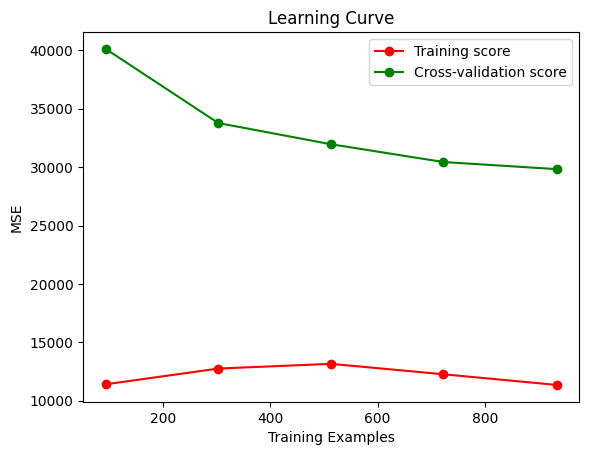

In [105]:
#check overfitting

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf,X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()


#GradientBooster Regressor

In [107]:
#, scoring = score, refit='R2')
GBR_params = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.1],
    'max_depth':[5,6,7]}

GridSearchCV_GBR = GridSearchCV(gbr, GBR_params, cv = 5, scoring='neg_root_mean_squared_error')
GridSearchCV_GBR.fit(X_train, y_train)

print("Best params", GridSearchCV_GBR.best_params_)
print("Best score", GridSearchCV_GBR.best_score_)

Best params {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Best score -29142.411058591086


In [110]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 500)
gbr.fit(X_train, y_train)
gbr_pred_data = gbr.predict(X_test)

In [111]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_gbr_data = mean_squared_error(y_test, gbr_pred_data)
r2_gbr_data = r2_score(y_test, gbr_pred_data)
rmse_gbr_data = np.sqrt(mse_gbr_data)

print(f"MSE_GBR_DATA : {mse_gbr_data}")
print(f"RMSE_GBR_Data :{rmse_gbr_data}")
print(f"R2_DATA: {r2_gbr_data}")

#compare MSE with y_var
comp_mse_ms_gbr_data = mse_gbr_data / (y_mean**2)
comp_mse_var_gbr_data = mse_gbr_data / y_var
print(f"MSE in Mean sqaured of y : {comp_mse_ms_gbr_data*100} %")
print(f"MSE in variance of y : {comp_mse_var_gbr_data*100} %")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
Mean squared:32732479122.41645
MSE_GBR_DATA : 640186356.3054659
RMSE_GBR_Data :25301.904203151706
R2_DATA: 0.9165372711651287
MSE in Mean sqaured of y : 1.9558138383323427 %
MSE in variance of y : 10.143797652991172 %


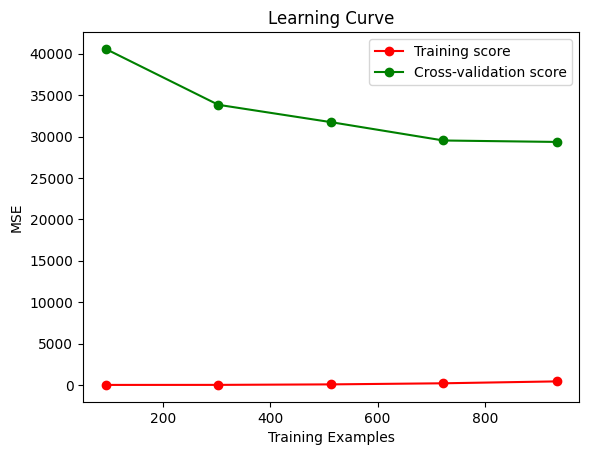

In [114]:
#check overfitting

#import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gbr,X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1 )

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

# Catboost regressor

In [ ]:
#!pip install catboost

In [48]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [ ]:
params = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.1, 0.5, 0.05],
    'depth':[5,6,7]}

GridSearchCV_cat = GridSearchCV(cat, params, cv = 5, scoring='neg_root_mean_squared_error')
GridSearchCV_cat.fit(X_train, y_train)

best_params = GridSearchCV_cat.best_params_
best_score = GridSearchCV_cat.best_score_

In [116]:
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'depth': 7, 'learning_rate': 0.1, 'n_estimators': 500}
Best Score: -26963.45904377466


In [ ]:
cat = CatBoostRegressor(n_estimators= 500,learning_rate= 0.1,depth= 7)
cat.fit(X_train, y_train)
cat_pred_data = cat.predict(X_test)

In [121]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_cat_data = mean_squared_error(y_test, cat_pred_data)
r2_cat_data = r2_score(y_test, cat_pred_data)
rmse_cat_data = np.sqrt(mse_cat_data)

print(f"MSE_CAT_DATA : {mse_cat_data}")
print(f"RMSE_CAT_Data :{rmse_cat_data}")
print(f"R2_CAT DATA: {r2_cat_data}")

#compare MSE with y_var
comp_mse_ms_cat_data = mse_cat_data / (y_mean**2)
comp_mse_var_cat_data = mse_cat_data / y_var
print(f"MSE in MS of y : {comp_mse_ms_cat_data*100}%")
print(f"MSE in variance of y : {comp_mse_var_cat_data*100}%")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
Mean squared:32732479122.41645
MSE_CAT_DATA : 742223796.6539464
RMSE_CAT_Data :27243.784550864926
R2_CAT DATA: 0.9032343896979923
MSE in MS of y : 2.267545314481368%
MSE in variance of y : 11.760588041804562%


In [122]:
#check overfitting

#import matplotlib.pyplot as plt
#from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(cat,X_train , y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

KeyboardInterrupt: 

#XGBoost regressor

In [123]:
params = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.1, 0.5, 0.05],
    'max_depth':[5,6,7]
    }

GridSearchCV_xgb = GridSearchCV(xgbr, params, cv = 5, scoring = 'neg_root_mean_squared_error')
GridSearchCV_xgb.fit(X_train, y_train)

best_params = GridSearchCV_xgb.best_params_
best_score = GridSearchCV_xgb.best_score_

In [124]:
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Best Score: -27981.891083993913


In [182]:
xgbr = XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 500)
xgbr.fit(X_train, y_train)
xgb_pred_data = xgbr.predict(X_test)

In [183]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_xgb_data = mean_squared_error(y_test, xgb_pred_data)
rmse_xgb_data = np.sqrt(mse_xgb_data)
r2_xgb_data = r2_score(y_test, xgb_pred_data)

print(f"MSE_XGB_DATA : {mse_xgb_data}")
print(f"RMSE_XGB_Data: {rmse_xgb_data}")
print(f"R2_DATA: {r2_xgb_data}")

comp_mse_ms_xgb_data = mse_xgb_data / (y_mean**2)
comp_mse_var_xgb_data = mse_xgb_data / y_var
print(f"MSE in MS of y : {comp_mse_ms_xgb_data*100}%")
print(f"MSE in variance of y : {comp_mse_var_xgb_data*100}%")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
Mean squared:32732479122.41645
MSE_XGB_DATA : 605190543.3275688
RMSE_XGB_Data: 24600.62079150786
R2_DATA: 0.9210997646018623
MSE in MS of y : 1.8488991960071584%
MSE in variance of y : 9.58928654532188%


In [ ]:
#check overfitting

#import matplotlib.pyplot as plt
#from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(xgbr,X_train , y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

#Stacking all models in one

In [127]:
y = data['SalePrice']

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression




rf = RandomForestRegressor(max_features = 'sqrt', n_estimators= 500, random_state = 42)
gbr = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 500)
cat = CatBoostRegressor(n_estimators= 500,learning_rate= 0.1,depth= 7)
xgbr = XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 500)

stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('gbr', gbr),
        ('cat', cat),
        ('xgbr', xgbr),

    ],
    final_estimator= Ridge(alpha=1.0)
)

stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)

In [129]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_stacking = mean_squared_error(y_test, stacking_pred)
rmse_stacking = np.sqrt(mse_stacking)
r2_stacking = r2_score(y_test, stacking_pred)

print(f"MSE_STACKING : {mse_stacking}")
print(f"RMSE_STACKING: {rmse_stacking}")
print(f"R2_STACKING: {r2_stacking}")

comp_mse_stacking_ms = mse_stacking / (y_mean**2)
comp_mse_stacking_var = mse_stacking / y_var

print(f"MSE in MS of y : {comp_mse_stacking_ms*100}%")
print(f"MSE in variance of y : {comp_mse_stacking_var*100}%")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
Mean squared:32732479122.41645
MSE_STACKING : 625353106.9869328
RMSE_STACKING: 25007.061142543975
R2_STACKING: 0.9184711197287836
MSE in MS of y : 1.9104972301308736%
MSE in variance of y : 9.908763778648845%


In [99]:
#check overfitting

train_sizes, train_scores, test_scores = learning_curve(stacking_model,data_scaled_encoded , y, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()


KeyboardInterrupt: 

# **SELECTED MODEL IS XGB REGRESSOR, **
WITH

MSE_XGB_DATA: 605,190,543.33

RMSE_XGB_Data: 24,600.62

R²_DATA: 0.9211

MSE in MS of y: 1.85%

MSE in variance of y: 9.59%

In [ ]:
important_features = gbr.feature_importances_
imp_gbr_features = pd.DataFrame({'features': data_scaled_encoded.columns, 'importance': important_features})
imp_gbr_features.sort_values(by='importance', ascending=False, inplace=True)
imp_gbr_features

,features,importance
74,SalePrice,9.951540e-01
62,GrLivArea,1.927775e-03
60,2ndFlrSF,1.019897e-03
5,LotConfig,9.318458e-04
59,1stFlrSF,6.970411e-04
...,...,...
23,BsmtFinType2,8.937118e-11
33,GarageCond,6.787929e-11
1,Street,5.912044e-12
9,Condition2,8.485608e-14


# Test Data

In [184]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data science projects /House pricing kaggle/test.csv')
test.sort_values(by='Id', inplace = True)

In [185]:
test.iloc[-1]

,1458
Id,2919
MSSubClass,60
MSZoning,RL
LotFrontage,74.0
LotArea,9627
...,...
MiscVal,0
MoSold,11
YrSold,2006
SaleType,WD


In [186]:
#add one more row with random data of each column
new_row = test.iloc[-1].copy()
new_row['Id'] = 2920
test = pd.concat([test, new_row.to_frame().T], ignore_index=True)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [187]:
test['YrSold_num'] = 2024 - test['YrSold']
test['YearBuilt_num'] = 2024 - test['YearBuilt']
test['GarageYrBlt_num'] = 2024 - test['GarageYrBlt']
test['YearRemodAdd'] = 2024 - test['YearRemodAdd']
test.drop(['YearRemodAdd','YearBuilt', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [135]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,YrSold_num,YearBuilt_num,GarageYrBlt_num
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,WD,Normal,14,63,63.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,WD,Normal,14,66,66.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,WD,Normal,14,27,27.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,WD,Normal,14,26,26.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,WD,Normal,14,32,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,WD,Abnorml,18,54,54.0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,WD,Abnorml,18,64,64.0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,WD,Normal,18,32,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,WD,Normal,18,31,31.0


In [423]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               1460 non-null   object
 1   MSSubClass       1460 non-null   object
 2   MSZoning         1456 non-null   object
 3   LotFrontage      1233 non-null   object
 4   LotArea          1460 non-null   object
 5   Street           1460 non-null   object
 6   Alley            107 non-null    object
 7   LotShape         1460 non-null   object
 8   LandContour      1460 non-null   object
 9   Utilities        1458 non-null   object
 10  LotConfig        1460 non-null   object
 11  LandSlope        1460 non-null   object
 12  Neighborhood     1460 non-null   object
 13  Condition1       1460 non-null   object
 14  Condition2       1460 non-null   object
 15  BldgType         1460 non-null   object
 16  HouseStyle       1460 non-null   object
 17  OverallQual      1460 non-null   

In [188]:
ord_cols = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                               'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces','YrSold_num']

In [189]:
data_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YearBuilt_num', 'GarageYrBlt_num'],
      dtype='object')

In [191]:
obj_cols = data_obj.columns
test_obj = test[obj_cols]

num_cols = data_num.columns
test_num = test[num_cols]

#test_num = test_num.drop('Id', axis = 1)

In [192]:
test_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YearBuilt_num', 'GarageYrBlt_num'],
      dtype='object')

In [421]:
test_obj.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
SaleType,1
SaleCondition,0
YrSold_num,0
YearBuilt_num,0


In [193]:
test_obj

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


# Handling test_obj null values

In [195]:
test_obj.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

KeyError: "['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] not found in axis"

In [197]:
columns_to_fill = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'SaleType']

for col in columns_to_fill:
    test_obj[col] = test_obj[col].fillna(test_obj[col].mode()[0])

In [ ]:
test_obj.groupby('BldgType')['GarageType'].value_counts().sort_values(ascending=False)

In [198]:
#filling garagetype
btype = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
gtype = ['Attchd', 'Detchd', 'Detchd', 'Detchd', 'Detchd']

for i in range(len(btype)):
  test_obj.loc[(test_obj['BldgType'] == btype[i] ) & (test_obj['GarageType'].isnull()), 'GarageType'] = gtype[i]

In [ ]:
test_obj.groupby('BldgType')['GarageFinish'].value_counts().sort_values(ascending=False)

In [199]:
#filling garagefinish
btype = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
g_fin = ['Unf', 'Fin', 'Unf', 'Unf', 'Unf']

for i in range(len(btype)):
  test_obj.loc[(test_obj['BldgType'] == btype[i] ) & (test_obj['GarageFinish'].isnull()), 'GarageFinish'] = g_fin[i]

In [ ]:
test_obj.groupby('BldgType')['GarageQual'].value_counts().sort_values(ascending=False)

In [200]:
#filling Garagequal
test_obj['GarageQual'] = test_obj['GarageQual'].fillna('TA')

In [ ]:
test_obj.groupby('BldgType')['GarageCond'].value_counts().sort_values(ascending=False)

In [201]:
#filling GarageCOnd
test_obj['GarageCond'] = test_obj['GarageCond'].fillna('TA')

In [204]:
test_obj.isnull().sum().sum()

0

# Handling test_num null values

In [205]:
test_num.isnull().sum().sum()

326

In [206]:
test_num['MasVnrArea'] = test_num['MasVnrArea'].fillna(test_num['MasVnrArea'].mode()[0])

In [ ]:
test_num.groupby('LotArea')['LotFrontage'].value_counts().sort_values(ascending=False)

In [207]:
#filling lot frintage
area = [1680, 6000, 7200, 9600, 10800]
front = [21, 50, 60, 80, 100]

for i in range(len(area)):
  test_num.loc[(test_num['LotArea'] <= area[i]) & (test_num['LotFrontage'].isnull()), 'LotFrontage'] = front[i]

test_num.loc[test_num['LotFrontage'].isnull(), 'LotFrontage'] = front[-1]

In [213]:
columns_to_fill = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea']

for col in columns_to_fill:
    test_num[col] = test_num[col].fillna(test_num[col].mode()[0])


In [214]:
#filling GarageYrBlt_num
for i in test_num['GarageYrBlt_num']:
  test_num.loc[test_num['GarageYrBlt_num'].isna(), 'GarageYrBlt_num'] = test_num['YearBuilt_num']

In [215]:
test_num.isnull().sum().sum()

0

In [243]:
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(0)

In [244]:
test[ord_cols].isnull().sum()

,0
OverallQual,0
OverallCond,0
BsmtFullBath,0
BsmtHalfBath,0
FullBath,0
HalfBath,0
BedroomAbvGr,0
KitchenAbvGr,0
TotRmsAbvGrd,0
Fireplaces,0


# Test data label encoding and Scaling

In [216]:
le = LabelEncoder()

for col in test_obj.columns:
  test_obj[col] = le.fit_transform(test_obj[col])

test_obj

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,...,3,3,6,1,2,3,4,2,8,4
1,3,1,0,3,0,0,0,12,2,2,...,3,2,6,1,2,3,4,2,8,4
2,3,1,0,3,0,4,0,8,2,2,...,3,3,6,1,0,3,4,2,8,4
3,3,1,0,3,0,4,0,8,2,2,...,3,2,6,1,0,3,4,2,8,4
4,3,1,0,1,0,4,0,22,2,2,...,3,2,6,1,1,3,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,1,3,3,0,4,0,10,2,2,...,3,3,6,4,2,3,4,2,8,0
1456,3,1,3,3,0,4,0,11,2,2,...,3,3,6,5,2,3,4,2,8,0
1457,3,1,3,3,0,4,0,11,2,2,...,3,3,6,1,2,3,4,2,8,4
1458,3,1,3,3,0,4,1,11,2,2,...,3,3,6,1,0,3,4,2,8,4


In [217]:
ord_cols

['OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'YrSold_num']

In [245]:
test_labld = pd.concat([test_obj, test[ord_cols]], axis = 1)
test_labld

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,YrSold_num
0,2,1,3,3,0,4,0,12,1,2,...,6,0.0,0.0,1,0,2,1,5,0,14
1,3,1,0,3,0,0,0,12,2,2,...,6,0.0,0.0,1,1,3,1,6,0,14
2,3,1,0,3,0,4,0,8,2,2,...,5,0.0,0.0,2,1,3,1,6,1,14
3,3,1,0,3,0,4,0,8,2,2,...,6,0.0,0.0,2,1,3,1,7,1,14
4,3,1,0,1,0,4,0,22,2,2,...,5,0.0,0.0,2,0,2,1,5,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,1,3,3,0,4,0,10,2,2,...,5,0.0,0.0,1,1,3,1,6,0,18
1456,3,1,3,3,0,4,0,11,2,2,...,7,1.0,0.0,1,0,4,1,7,1,18
1457,3,1,3,3,0,4,0,11,2,2,...,5,0.0,1.0,1,0,3,1,6,0,18
1458,3,1,3,3,0,4,1,11,2,2,...,5,0.0,0.0,2,1,3,1,9,1,18


In [221]:
test_num_scaled = scaler.fit_transform(test_num)
test_num_scaled = pd.DataFrame(test_num_scaled, columns = test_num.columns)
test_num_scaled

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_num,GarageYrBlt_num
0,-0.875051,0.369891,0.364080,-0.563487,0.063467,0.517902,-0.649003,-0.368533,-0.654473,-0.775933,...,0.366212,-0.701865,-0.360599,-0.088796,1.819733,-0.057207,-0.092212,-0.039483,0.341490,0.541032
1,-0.875051,0.413961,0.898194,0.047095,1.063419,-0.297578,-0.337883,0.639835,0.433699,-0.775933,...,2.347690,-0.178884,-0.360599,-0.088796,-0.301430,-0.057207,19.737204,-0.039483,0.440257,0.649154
2,0.061330,0.105467,0.809949,-0.563487,0.773323,-0.297578,-0.953261,-0.264763,-0.574054,0.890352,...,0.930111,-0.207939,-0.360599,-0.088796,-0.301430,-0.057207,-0.092212,-1.140974,-0.843713,-0.756438
3,0.061330,0.281750,0.032101,-0.450416,0.357958,-0.297578,-0.525470,-0.269275,-0.579080,0.835681,...,2.089236,-0.178884,-0.360599,-0.088796,-0.301430,-0.057207,-0.092212,-0.039483,-0.876636,-0.792478
4,1.465902,-1.260719,-0.972114,-0.563487,-0.387061,-0.297578,1.059871,0.529298,0.310557,-0.775933,...,-0.730258,0.489369,-0.360599,-0.088796,2.243965,-0.057207,-0.092212,-1.875302,-0.679102,-0.576233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.402283,-2.230271,-1.600329,-0.563487,-0.411236,-0.297578,-0.594100,-1.126500,-1.534057,0.521915,...,-0.730258,-0.353211,-0.360599,-0.088796,-0.301430,-0.057207,-0.092212,-0.773810,0.045189,0.216665
1456,-0.875051,3.895533,2.055879,-0.563487,1.724926,-0.297578,-1.266669,0.402970,0.169823,-0.775933,...,2.982076,-0.701865,-0.360599,-0.088796,-0.301430,-0.057207,-0.092212,1.062009,0.374413,0.577073
1457,0.646568,-0.423379,0.125597,-0.563487,-0.224432,-0.297578,0.048730,-0.300857,-0.468504,-0.775933,...,-0.103703,-0.236993,-0.360599,-0.088796,-0.301430,-0.057207,1.018236,0.327681,-0.679102,-0.576233
1458,0.061330,0.105467,-0.038777,-0.032055,0.700799,-0.297578,-0.722208,-0.111365,-0.403163,1.610587,...,0.757809,-0.004557,-0.360599,-0.088796,-0.301430,-0.057207,-0.092212,1.796336,-0.712024,-0.612274


In [222]:
test_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   float64
 1   LotFrontage      1460 non-null   float64
 2   LotArea          1460 non-null   float64
 3   MasVnrArea       1460 non-null   float64
 4   BsmtFinSF1       1460 non-null   float64
 5   BsmtFinSF2       1460 non-null   float64
 6   BsmtUnfSF        1460 non-null   float64
 7   TotalBsmtSF      1460 non-null   float64
 8   1stFlrSF         1460 non-null   float64
 9   2ndFlrSF         1460 non-null   float64
 10  LowQualFinSF     1460 non-null   float64
 11  GrLivArea        1460 non-null   float64
 12  GarageCars       1460 non-null   float64
 13  GarageArea       1460 non-null   float64
 14  WoodDeckSF       1460 non-null   float64
 15  OpenPorchSF      1460 non-null   float64
 16  EnclosedPorch    1460 non-null   float64
 17  3SsnPorch     

# Test Algorithms

In [246]:
test_scaled_encoded = pd.concat([test_labld, test_num_scaled], axis =1)
#test_scaled_encoded.drop('Id', axis = 1, inplace = True)

In [225]:
test_scaled_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_num,GarageYrBlt_num
0,2,1,3,3,0,4,0,12,1,2,...,0.366212,-0.701865,-0.360599,-0.088796,1.819733,-0.057207,-0.092212,-0.039483,0.341490,0.541032
1,3,1,0,3,0,0,0,12,2,2,...,2.347690,-0.178884,-0.360599,-0.088796,-0.301430,-0.057207,19.737204,-0.039483,0.440257,0.649154
2,3,1,0,3,0,4,0,8,2,2,...,0.930111,-0.207939,-0.360599,-0.088796,-0.301430,-0.057207,-0.092212,-1.140974,-0.843713,-0.756438
3,3,1,0,3,0,4,0,8,2,2,...,2.089236,-0.178884,-0.360599,-0.088796,-0.301430,-0.057207,-0.092212,-0.039483,-0.876636,-0.792478
4,3,1,0,1,0,4,0,22,2,2,...,-0.730258,0.489369,-0.360599,-0.088796,2.243965,-0.057207,-0.092212,-1.875302,-0.679102,-0.576233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,1,3,3,0,4,0,10,2,2,...,-0.730258,-0.353211,-0.360599,-0.088796,-0.301430,-0.057207,-0.092212,-0.773810,0.045189,0.216665
1456,3,1,3,3,0,4,0,11,2,2,...,2.982076,-0.701865,-0.360599,-0.088796,-0.301430,-0.057207,-0.092212,1.062009,0.374413,0.577073
1457,3,1,3,3,0,4,0,11,2,2,...,-0.103703,-0.236993,-0.360599,-0.088796,-0.301430,-0.057207,1.018236,0.327681,-0.679102,-0.576233
1458,3,1,3,3,0,4,1,11,2,2,...,0.757809,-0.004557,-0.360599,-0.088796,-0.301430,-0.057207,-0.092212,1.796336,-0.712024,-0.612274


In [247]:
#only 2 values in 2 columns are zero
for col in ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'YrSold_num']:
  test_scaled_encoded[col] = test_scaled_encoded[col].astype(int)

## Rf regressor

In [211]:
data_scaled_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_num,GarageYrBlt_num
0,3,1,3,3,0,4,0,5,2,2,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.050994,-1.007405
1,3,1,3,3,0,2,0,24,1,2,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.156734,0.019300
2,3,1,0,3,0,4,0,5,2,2,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-0.984752,-0.931353
3,3,1,0,3,0,0,0,6,2,2,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.863632,-0.817275
4,3,1,0,3,0,2,0,15,2,2,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,-0.951632,-0.893327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.918511,-0.855301
1456,3,1,3,3,0,4,0,14,2,2,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-0.222975,-0.056753
1457,3,1,3,3,0,4,0,6,2,2,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.002492,1.350213
1458,3,1,3,3,0,4,0,12,2,2,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,0.704406,1.007978


In [212]:
test_scaled_encoded.isnull().sum().sum()

0

In [213]:
test_num_scaled.isnull().sum().sum()


0

In [214]:
test_scaled_encoded.isnull().sum().sum()

0

In [215]:
test_scaled_encoded['BsmtFullBath'] = test_scaled_encoded['BsmtFullBath'].fillna(test_scaled_encoded['BsmtFullBath'].mode()[0])
test_scaled_encoded['BsmtHalfBath'] = test_scaled_encoded['BsmtHalfBath'].fillna(test_scaled_encoded['BsmtHalfBath'].mode()[0])

In [216]:
missing_cols = set(data_scaled_encoded.columns) - set(test_scaled_encoded.columns)
print(missing_cols)

set()


In [217]:
"""rf_params ={
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state = 42)
GridSearchCV_rf = GridSearchCV(rf, rf_params, cv=5,
)
GridSearchCV_rf.fit(test_scaled_encoded, y)
# Best parameters and score
best_params = GridSearchCV_rf.best_params_
best_score = GridSearchCV_rf.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")"""

'rf_params ={\n    \'n_estimators\': [100, 200, 300],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\nrf = RandomForestRegressor(random_state = 42)\nGridSearchCV_rf = GridSearchCV(rf, rf_params, cv=5,\n)\nGridSearchCV_rf.fit(test_scaled_encoded, y)\n# Best parameters and score\nbest_params = GridSearchCV_rf.best_params_\nbest_score = GridSearchCV_rf.best_score_\n\nprint(f"Best Parameters: {best_params}")\nprint(f"Best Score: {best_score}")'

In [218]:
rf = RandomForestRegressor(max_features = 'sqrt', n_estimators= 300, random_state = 42)
rf.fit(test_scaled_encoded, y)
rf_pred_test = rf.predict(test_scaled_encoded)

In [219]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")

mse_rf_test = mean_squared_error(y, rf_pred_test)
r2_rf_test = r2_score(y, rf_pred_test)

print(f"MSE_RF_DATA : {mse_rf_test}")
print(f"R2_DATA: {r2_rf_test}")

#compare
comp_mse_ms = mse_rf_test / (y_mean**2)
comp_mse_var = mse_rf_test / y_var
print(f"MSE_test in MS of y : {comp_mse_ms*100}%")
print(f"MSE_test in variance : {comp_mse_var*100}%")


#compare train data and test data
print(f"MSE_RF_DATA in MS of y: {comp_mse_ms_data*100 }% ","\n",f"MSE_RF_DATA in variance of y: {comp_mse_var_data*100}%")
print(f"MSE_test in MS of y : {comp_mse_ms*100}%", "\n", f"MSE_test in variance : {comp_mse_var*100}%")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
MSE_RF_DATA : 883757585.5905889
R2_DATA: 0.8598720135246705
MSE_test in MS of y : 2.6999408822210413%
MSE_test in variance : 14.003200840240119%


NameError: name 'comp_mse_ms_data' is not defined

## GBR in test data

In [267]:
test_scaled_encoded.shape

(1460, 74)

In [261]:
#apply GBR from trained model
gbr = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 500)
gbr.fit(test_scaled_encoded, y)
gbr_pred_test = gbr.predict(test_scaled_encoded)

In [262]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_gbr_test = mean_squared_error(y, gbr_pred_test)
r2_gbr_test = r2_score(y, gbr_pred_test)
rmse_gbr_test = np.sqrt(mse_gbr_test)

print(f"MSE_GBR_TEST : {mse_gbr_test}")
print(f"RMSE_GBR_TEST :{rmse_gbr_test}")
print(f"R2_TEST: {r2_gbr_test}")

#compare MSE with y_var
comp_mse_ms_gbr_test = mse_gbr_test/ (y_mean**2)
comp_mse_var_gbr_test = mse_gbr_test / y_var
print(f"mse_gbr_TEST in MS of y : {comp_mse_ms_gbr_test*100}%")
print(f"mse_gbr_TEST in variance of y : {comp_mse_var_gbr_test*100}%")


#compate TRAIN MODEL AND TEST MODEL
print(f"MSE GBR_DATA in MS of y: {comp_mse_ms_gbr_data*100 }% ","\n",f"MSE_gbr_DATA in variance of y: {comp_mse_var_gbr_data*100}%")
print(f"MSE_GBR_Test in MS of y : {comp_mse_ms_gbr_test*100}%", "\n", f"MSE_gbr_test in variance : {comp_mse_var_gbr_test*100}%")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
Mean squared:32732479122.41645
MSE_GBR_TEST : 34832642.45620497
RMSE_GBR_TEST :5901.918540288825
R2_TEST: 0.9944769605029854
mse_gbr_TEST in MS of y : 0.10641614503421543%
mse_gbr_TEST in variance of y : 0.5519256593249515%
MSE GBR_DATA in MS of y: 0.005175425467646604%  
 MSE_gbr_DATA in variance of y: 0.026842262634110436%
MSE_GBR_Test in MS of y : 0.10641614503421543% 
 MSE_gbr_test in variance : 0.5519256593249515%


In [263]:
"""cat_test = CatBoostRegressor(n_estimators= 500,
    learning_rate= 0.1,
    depth= 7)
cat_test.fit(test_scaled_encoded, y)
cat_pred_test = cat_test.predict(test_scaled_encoded)"""

NameError: name 'CatBoostRegressor' is not defined

In [ ]:
"""y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_cat_test = mean_squared_error(y, cat_pred_test)
r2_cat_test = r2_score(y, cat_pred_test)
rmse_cat_test = np.sqrt(mse_cat_test)

print(f"MSE_CAT_TEST : {mse_cat_test}")
print(f"RMSE_CAT_TEST:{rmse_cat_test}")
print(f"R2_TEST: {r2_cat_test}")

#compare MSE with y_var
comp_mse_ms_cat_test = mse_cat_test/ (y_mean**2)
comp_mse_var_cat_test = mse_cat_test / y_var
print(f"mse_cat_test in MS of y : {comp_mse_ms_cat_test*100}%")
print(f"mse_cat_test in variance of y : {comp_mse_var_cat_test*100}%")


#compate TRAIN MODEL AND TEST MODEL
print(f"MSE cat_DATA in MS of y: {comp_mse_ms_cat_data*100 }% ","\n",f"MSE_cat_DATA in variance of y: {comp_mse_var_cat_data*100}%")
print(f"mse_cat_test in MS of y : {comp_mse_ms_cat_test*100}%", "\n", f"mse_cat_test in variance of y : {comp_mse_var_cat_test*100}%")"""

In [266]:
test_scaled_encoded

(1460,)

#XGBR

In [248]:
xgbr.fit(test_scaled_encoded, y)
xgbr_pred_test = xgbr.predict(test_scaled_encoded)

In [251]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_xgbr_test = mean_squared_error(y, xgbr_pred_test)
r2_xgbr_test = r2_score(y, xgbr_pred_test)
rmse_xgbr_test = np.sqrt(mse_xgbr_test)

print(f"MSE_XGBR_TEST : {mse_xgbr_test}")
print(f"RMSE_XGBR_TEST :{rmse_xgbr_test}")
print(f"R2_TEST: {r2_xgbr_test}")

comp_mse_ms_xgbr_test = mse_xgbr_test/ (y_mean**2)
comp_mse_var_xgbr_test = mse_xgbr_test / y_var

print(f"mse_xgbr_test in MS of y : {comp_mse_ms_xgbr_test*100}%")
print(f"mse_xgbr_test in variance of y : {comp_mse_var_xgbr_test*100}%")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
Mean squared:32732479122.41645
MSE_XGBR_TEST : 77627470.33935675
RMSE_XGBR_TEST :8810.645285071732
R2_TEST: 0.9876914424371722
mse_xgbr_test in MS of y : 0.237157320253798%
mse_xgbr_test in variance of y : 1.2300127043949087%


In [255]:

submission_df = pd.DataFrame({'Id':test['Id'], 'SalePrice': xgbr_pred_test})


submission_df.to_csv('submission_gbr_test.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!


In [256]:
test['SalePrice'] = xgbr_pred_test
test.to_csv('Submission_Predicteds.csv', index=False)

#Interpretation

##XGBR is best model:-

###XGBR model on train data
As the mean is 1,80,921/-
Variance is 631,11,11,264/-

Mean sqaured = Mean*2 (calculated for future reference with MSE) = 32,73,24,08,241/-


###MSE = 605,190,543 which is just 1.85%  of mean sqaured

and

###Only 9.59% error's present in total variability


###XGBR on test data

**MSE** = 77,627,470 which 0.25% of Mean Squared
and

**1.23% errors present in total variability**

Interpretation:
R² Score:

The R² score is higher on the test data (0.988) than on the train data (0.921), which means that the model performs better on the unseen test data.
MSE & RMSE:

The Mean Squared Error and Root Mean Squared Error are significantly lower for the test data than the train data. This indicates that the model's predictions on the test data are closer to the actual values, resulting in less overall error.
Variance & Mean Squared Comparison:

The MSE as a percentage of the variance and mean squared on the test data is much smaller compared to the train data, suggesting that the model generalizes well to unseen data.